# Theoretical background

References

My algorithm learning notebook following the live lesson series [**"Data Structures, Algorithms, and Machine Learning Optimization"**](https://learning.oreilly.com/videos/data-structures-algorithms/9780137644889/) by Dr. Jon Krohn. I adapted some and partially modified or added entirely new code. Notes largely based on and (some of them entirely) from Jon's notebooks and learning materials. The lesson and original notebook source code at:

https://learning.oreilly.com/videos/data-structures-algorithms/9780137644889/
https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/7-algos-and-data-structures.ipynb

# 1.2 A Brief History of Data

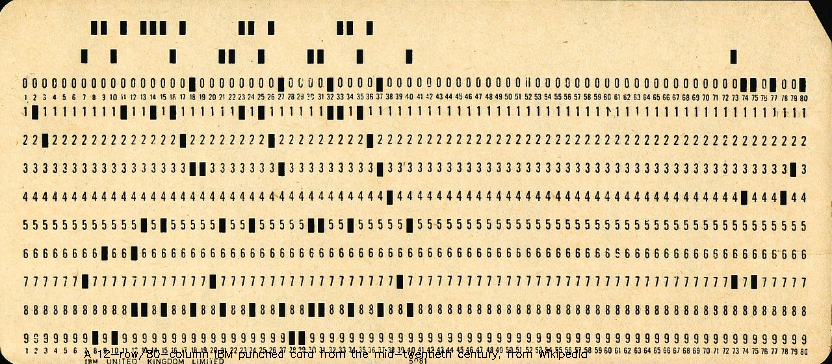

In [6]:
path = "/content/here/MyDrive/Math works/ALGO1/Used_Punchcard_(5151286161).jpg"
show_img(path, resize=0.65, source="A 12-row/80-column IBM punched card from the mid-twentieth century, from Wikipedia", source_scale=0.35)

- Data are units of information
  - 18th c. from Latin *datum* meaning 'something given'
- 4b-year-old **RNA** (Earth is 4.5b) $\rightarrow$ DNA
- 7500 BCE **Mesopotamia**: written clay records
- Punch cards / punched tape
  - 1950s ~ 1970s: common in computing (NASA, IBM, US military)
- 1946: term 'data' used in computing
- 1954: term "data processing"
- **Data structures**: lists, dictionaries, objects, etc.

# 1.3 A Brief History of Algorithms

Text(0.5, 1.05, 'محمد بن موسی خوارزمی\u200e, pictures from Wikipedia')

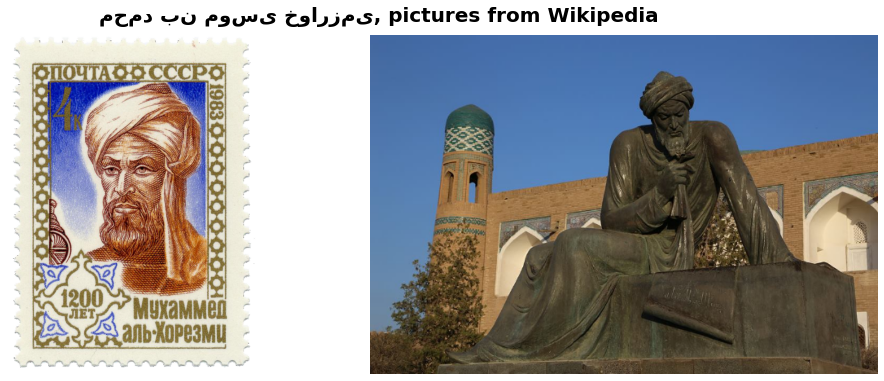

In [17]:
path = "/content/here/MyDrive/Math works/ALGO1/alkhwarizmi."
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
alkhwarizmi1 = get_img(path+"png", resize=0.8, cvtColor=True)
alkhwarizmi2 = get_img(path+"jpg", resize=0.65, cvtColor=True)
ax[0].imshow(alkhwarizmi1)
ax[0].axis('off')
ax[1].imshow(alkhwarizmi2)
ax[1].axis('off')
plt.tight_layout()
plt.suptitle("محمد بن موسی خوارزمی‎, pictures from Wikipedia", fontsize=20, fontweight='bold', y=1.05)


- Umambiguous instructions for solving problems or performing computation
- From initial state (input) go through finite well-defiend states 'til final state (with output)
- **Can incorporate random probabilities so not necessarily deterministic**. SGD, Markov chain Monte Carlo (MCMC)
  - MCMC: *In statistics, Markov chain Monte Carlo (MCMC) methods comprise a class of algorithms for sampling from a probability distribution. By constructing a Markov chain that has the desired distribution as its equilibrium distribution, one can obtain a sample of the desired distribution by recording states from the chain. The more steps are included, the more closely the distribution of the sample matches the actual desired distribution. Various algorithms exist for constructing chains, including the Metropolis–Hastings algorithm.([Wikipedia](https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo))*
- Ancient arithmetic algorithms (for divisions)
  - Babylonians (2500 BCE), Egyptians (1500 BCE)
  - 9th C.: Arab cryptographic algorithms
    - Etymology from Persian polymath: Muḥammad ibn Mūsā al-Khwārizmī (محمد بن موسی خوارزمی‎)
- 1930s: Modern concept formalises
  - Gödel, Alan Turing, ...

# 1.4 Applications to Machine Learning

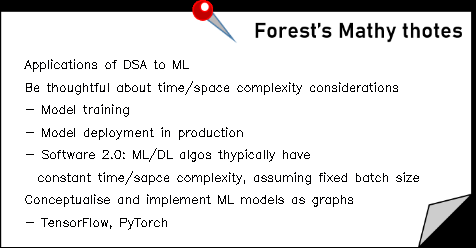

In [24]:
# Lecture notes, from live lesson 1.4 Applications to Machine Learning
notes = ["Applications of DSA to ML",
         "Be thoughtful about time/space complexity considerations",
         "- Model training",
         "- Model deployment in production",
         "- Software 2.0: ML/DL algos thypically have",
         "  constant time/sapce complexity, assuming fixed batch size",
         "Conceptualise and implement ML models as graphs",
         "- TensorFlow, PyTorch"]

sticky_notes(notes, fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.4)

## Basic Setup

In [19]:
import math
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

import cv2
from IPython.display import HTML, display
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('here')

def set_css():
  display(HTML('''<style> pre { white-space: pre-wrap; } </style>'''))
get_ipython().events.register('pre_run_cell', set_css)

# Shows the image immediately. 
# Resize option available.
# If you are using others' image, you can pass in a string parameter to cite the source.
def show_img(path, resize=None, source=None, source_scale=0.5):
    img = cv2.imread(path)
    if (resize != None):
        img = cv2.resize(img, dsize=(0,0), fx=resize, fy=resize)
    if(source != None):
        cite_source(img, source, scale=source_scale)
    cv2_imshow(img)

# Turns the path into an image object. Resize option available.
def get_img(path, resize=None, cvtColor=False):
  img = cv2.imread(path)
  if (cvtColor==True):
      img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
  if (resize != None):
      img = cv2.resize(img, dsize=(0,0), fx=resize, fy=resize)
  return img

# Puts text of source on the image.
# Avoiding plagiarism and crediting others' hard work is important.
def cite_source(img, source, org=None, scale=0.7, color=1):
    if (org == None):
        img = cv2.putText(img, source, org=(int(np.ceil(img.shape[1]*0.1)), int(np.ceil(img.shape[0]*0.98))),
                          fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=scale, color=1)
    elif (org != None):
        img = cv2.putText(img, source, org=org,
                          fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=scale, color=1)
    return img

# Take notes on a sticky note.
def take_notes(img, source, org, fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=None, color=1, thickness=1):
    if (org == None):
        img = cv2.putText(img, source, org=( int(np.ceil( img.shape[1] * 0.9 )), int(np.ceil( img.shape[0] * 0.1 )) ),
                          fontFace=fontFace, fontScale=fontScale, color=color, thickness=thickness)
    elif (org != None):
        img = cv2.putText(img, source, org=( int(np.ceil( img.shape[1] * org[0] )), int(np.ceil( img.shape[0] * org[1] )) ),
                          fontFace=fontFace, fontScale=fontScale, color=color, thickness=thickness)
    return img

def sticky_notes(notes, fontScale=0.5, fontFace=cv2.FONT_HERSHEY_TRIPLEX, return_object=False):
    path = "/content/here/MyDrive/Math works/notes.png"    
    img = get_img(path, resize=0.65)

    for i, note in enumerate(notes):
        img = take_notes(img, note, fontFace=fontFace, org=(1/20,(i+3)/11), fontScale=fontScale)        
    if (return_object == True):
        return img
    else:
        cv2_imshow(img)

# Code by Bill Grates on Stackoverflow
# https://stackoverflow.com/users/5629538/bill-grates
# https://stackoverflow.com/questions/32609098/how-to-fast-change-image-brightness-with-python-opencv

def increase_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value
    
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

Drive already mounted at here; to attempt to forcibly remount, call drive.mount("here", force_remount=True).
